## Named Entity Recognition 

- The named entities are pre-defined categories chosen according the use case such as names of people, organizations, places, codes, time notations, monetary values, etc.

- NER aims to assign a class to each token (usually a single word) in a sequence. Because of this, NER is also referred to as token classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


-  This Project where developed using Hugging Face simple transformers 

### Import Packages
- Numpy
- pandas 
- matplotlib
- seaborn 


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/drive/MyDrive/datasets/ner.csv")

In [5]:
data.head()

,text,labels
0,Thousands of demonstrators have marched throug...,O O O O O O B-geo O O O O O B-geo O O O O O B-...
1,Iranian officials say they expect to get acces...,B-gpe O O O O O O O O O O O O O O B-tim O O O ...
2,Helicopter gunships Saturday pounded militant ...,O O B-tim O O O O O B-geo O O O O O B-org O O ...
3,They left after a tense hour-long standoff wit...,O O O O O O O O O O O
4,U.N. relief coordinator Jan Egeland said Sunda...,B-geo O O B-per I-per O B-tim O B-geo O B-gpe ...


In [6]:
df = pd.read_csv("/content/drive/MyDrive/datasets/ner_dataset.csv",encoding="latin1")

In [7]:
df.sample(5)  

,Sentence #,Word,POS,Tag
548527,NaN,the,DT,O
416272,NaN,a,DT,O
240345,NaN,U.S.-led,JJ,O
899175,NaN,U.S.,NNP,B-geo
81238,NaN,discriminatory,JJ,O


- Developing bert model using csv file then will apply the model on Article text

- The goal of Named Entity Recognition is to locate and classify named entities in a sequence. 
- The named entities are pre-defined categories chosen according to the use case such as names of people, organizations, places, codes, time notations, monetary values, etc. 
- Essentially, NER aims to assign a class to each token (usually a single word) in a sequence. 
- Because of this, NER is also referred to as token classification.

In [8]:
## checking different_formats in sentence #

df['Sentence #'].value_counts()

Sentence: 42125    1
Sentence: 20548    1
Sentence: 34632    1
Sentence: 34832    1
Sentence: 18743    1
                  ..
Sentence: 18541    1
Sentence: 3540     1
Sentence: 40014    1
Sentence: 5688     1
Sentence: 7841     1
Name: Sentence #, Length: 47959, dtype: int64

In [9]:
df['Sentence #'].unique()

array(['Sentence: 1', nan, 'Sentence: 2', ..., 'Sentence: 47957',
       'Sentence: 47958', 'Sentence: 47959'], dtype=object)

In [10]:
### Different sentence has different words and will apply bert model for different words

In [11]:
df.rename(columns={'Sentence #':'sentence_id','Word':'words','Tag':'label'},inplace=True)

In [12]:
df.sample(4)

,sentence_id,words,POS,label
843098,NaN,mission,NN,O
12098,NaN,unclear,JJ,O
525948,NaN,the,DT,O
452637,NaN,Health,NNP,I-org


In [13]:
df = df.fillna(method = 'ffill')

In [14]:
df.sample(5)

,sentence_id,words,POS,label
167956,Sentence: 7665,the,DT,O
146369,Sentence: 6672,at,IN,O
782420,Sentence: 35763,.,.,O
985584,Sentence: 45063,of,IN,O
610999,Sentence: 27931,with,IN,O


## Labels Explanation

In [15]:
df['label'].unique()

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat'], dtype=object)

- O =  Outside of a named entity
- B-MIS = Beginning of a miscellaneous entity right after another miscellaneous entity
- I-MIS = Miscellaneous entity
- B-PER = Beginning of a person’s name right    after another person’s name
- I-PER = Person’s name
- B-ORG = Beginning of an organisation right after another organisation
- I-ORG = Organisation
- B-LOC = Beginning of a location right after another location
- I-LOC = Location

In [16]:
df['label'].value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: label, dtype: int64

In [17]:
## splitting the data into train_test for model creation

In [18]:
X = df[['sentence_id','words']]
y = df['label']

In [19]:
X.head()

,sentence_id,words
0,Sentence: 1,Thousands
1,Sentence: 1,of
2,Sentence: 1,demonstrators
3,Sentence: 1,have
4,Sentence: 1,marched


In [20]:
y.head()

0    O
1    O
2    O
3    O
4    O
Name: label, dtype: object

- Preparing data for training and developing model using Hugging face transformers bert algorithm

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.33 , random_state = 42)

In [23]:
#building up train data and test data
train_data = pd.DataFrame({"sentence_id":X_train["sentence_id"],"words":X_train["words"],"labels":y_train})
test_data = pd.DataFrame({"sentence_id":X_test["sentence_id"],"words":X_test["words"],"labels":y_test})

In [24]:
train_data.sample(5)

,sentence_id,words,labels
779143,Sentence: 35619,in,O
362058,Sentence: 16562,challenged,O
391660,Sentence: 17907,of,O
535395,Sentence: 24491,by,O
471447,Sentence: 21559,attacks,O


In [25]:
test_data.head()

,sentence_id,words,labels
781974,Sentence: 35746,the,O
937737,Sentence: 42841,investors,O
907828,Sentence: 41472,New,B-org
784628,Sentence: 35864,his,O
662460,Sentence: 30266,the,O


### Training Models 

In [27]:
!pip install simpletransformers

     |████████████████████████████████| 221 kB 4.2 MB/s 
     |████████████████████████████████| 1.2 MB 6.8 MB/s 
     |████████████████████████████████| 124 kB 14.1 MB/s 
     |████████████████████████████████| 3.3 MB 12.3 MB/s 
     |████████████████████████████████| 264 kB 41.7 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 1.8 MB 46.2 MB/s 
     |████████████████████████████████| 8.0 MB 20.6 MB/s 
     |████████████████████████████████| 2.6 MB 47.3 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 636 kB 36.4 MB/s 
     |████████████████████████████████| 895 kB 37.4 MB/s 
     |████████████████████████████████| 133 kB 52.7 MB/s 
     |████████████████████████████████| 138 kB 38.7 MB/s 
     |████████████████████████████████| 170 kB 53.9 MB/s 
     |████████████████████████████████| 97 kB 6.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |██████████████████

- NERModel -> Named Entity Recognition model which already trained on bert Algorithm using dataset https://www.clips.uantwerpen.be/conll2003/ner/

- NERArgs -> works like a Hyper parameter tuning (selecting best parameters)

In [28]:
from simpletransformers.ner import NERModel,NERArgs

In [29]:
df.head()

,sentence_id,words,POS,label
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [30]:
label = df['label'].unique().tolist()

In [31]:
label

['O',
 'B-geo',
 'B-gpe',
 'B-per',
 'I-geo',
 'B-org',
 'I-org',
 'B-tim',
 'B-art',
 'I-art',
 'I-per',
 'I-gpe',
 'I-tim',
 'B-nat',
 'B-eve',
 'I-eve',
 'I-nat']

In [ ]:
a = NERArgs()

In [ ]:
a.num_train_epochs = 2
a.learning_rate = 1e-4
a.train_batch_size = 32
a.eval_batch_size = 32
a.overwrite_output_dir = True

# Bert Model without Hyper_Parameter Tuning Techniques

In [ ]:
model_bert = NERModel('bert', 'bert-base-cased',labels=label,args =a)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
model_bert.train_model(train_data,eval_data = test_data,acc=accuracy_score)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1499 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/ner/ner_model.py:775: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 2:   0%|          | 0/1499 [00:00<?, ?it/s]

(2998, 0.16889741208921222)

In [ ]:
#training_data
res_train_bert , out_put_train_bert , pred_list_train_bert = model_bert.eval_model(train_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1499 [00:00<?, ?it/s]

In [ ]:
res_train_bert

{'eval_loss': 0.0854069190919946,
 'precision': 0.8966061327776124,
 'recall': 0.8712897066481513,
 'f1_score': 0.8837666529725923}

In [ ]:
# test_data
res_test_bert , out_put_test_bert , pred_list_test_bert = model_bert.eval_model(test_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1494 [00:00<?, ?it/s]

In [ ]:
# test_data
res_test_bert 

{'eval_loss': 0.15920350193563435,
 'precision': 0.8308423913043478,
 'recall': 0.7837612148988231,
 'f1_score': 0.8066153692415309}

In [ ]:
# checking predictions
prediction_bert_1 , model_output_bert_1 = model_bert.predict(['India is a great Country America'])

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prediction_bert_1

[[{'India': 'B-geo'},
  {'is': 'O'},
  {'a': 'O'},
  {'great': 'O'},
  {'Country': 'O'},
  {'America': 'B-geo'}]]

In [ ]:
!rm -rf outputs

In [ ]:
!rm -rf cache_dir

In [ ]:
!rm -rf runs

# Bert model with HyperParameter Tuning Techniques

In [32]:
#### Bert Improvement 


In [33]:
Arguments = NERArgs()


In [34]:
import sklearn
from sklearn.metrics import accuracy_score

In [36]:
Arguments.num_train_epochs = 3
Arguments.train_batch_size = 32
Arguments.eval_batch_size = 32
Arguments.learning_rate = 4e-5
Arguments.max_seq_length = 128
Arguments.adam_epsilon = 1e-8
Arguments.do_lower_case = True
Arguments.n_gpu = 1
Arguments.overwrite_output_dir = True



In [37]:
model_bert_2 = NERModel('bert','bert-base-cased',labels=label,args=Arguments)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [38]:
model_bert_2.train_model(train_data,eval_data=test_data,acc = accuracy_score)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1499 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/ner/ner_model.py:775: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 3:   0%|          | 0/1499 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/1499 [00:00<?, ?it/s]

(4497, 0.20016481913916132)

In [ ]:
res_train_bert_2,out_put_train_bert_2,pred_list_train_bert_2 = model_bert_2.eval_model(train_data) 

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1499 [00:00<?, ?it/s]

In [ ]:
res_train_bert_2

{'eval_loss': 0.10674857721788893,
 'f1_score': 0.8585737947440074,
 'precision': 0.8754974189344961,
 'recall': 0.8422920403479334}

In [ ]:
res_test_bert_2,out_put_test_bert_2,pred_list_test_bert_2 = model_bert_2.eval_model(test_data) 

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1494 [00:00<?, ?it/s]

In [ ]:
res_test_bert_2

{'eval_loss': 0.20559780672691275,
 'f1_score': 0.7651435938562743,
 'precision': 0.8016080658541255,
 'recall': 0.7318522546316075}

## DistleBert Model 

In [ ]:
model_dist = NERModel('distilbert','distilbert-base-uncased',labels=label,args=a)

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForTokenClassification: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN t

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
model_dist.train_model(train_data,eval_data=test_data,acc = accuracy_score)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1499 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/ner/ner_model.py:775: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 2:   0%|          | 0/1499 [00:00<?, ?it/s]

(2998, 0.40581397761934357)

In [ ]:
# train_data using distlebert 
res_train_dist , out_put_train_dist , pred_list_train_dist = model_dist.eval_model(train_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1499 [00:00<?, ?it/s]

In [ ]:

res_train_dist

{'eval_loss': 0.3430997580438952,
 'f1_score': 0.4032609647879703,
 'precision': 0.433036356593437,
 'recall': 0.3773168238538834}

In [ ]:
## test_data using distlebert 
res_test_dist , out_put_test_dist , pred_list_test_dist = model_dist.eval_model(test_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1494 [00:00<?, ?it/s]

In [ ]:
res_test_dist

{'eval_loss': 0.4154712584822213,
 'f1_score': 0.29140490811980896,
 'precision': 0.3696132266921332,
 'recall': 0.2405134578785878}

In [ ]:
# checking predictions
prediction_dist_1 , model_output_dist_1 = model_dist.predict(['India is a great Country America'])

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prediction_dist_1

[[{'India': 'I-per'},
  {'is': 'O'},
  {'a': 'O'},
  {'great': 'O'},
  {'Country': 'B-per'},
  {'America': 'B-per'}]]

- comparing to dist model bert is working better.
- distilbert model predictions are completely wrong .because of high loss in the model

## Roberta Model

In [ ]:
model_robt = NERModel( "roberta", "roberta-base",labels = label , args = a)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForTokenClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
model_robt.train_model(train_data,eval_data=test_data,acc = accuracy_score)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1499 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/ner/ner_model.py:775: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 2:   0%|          | 0/1499 [00:00<?, ?it/s]

(2998, 0.1929586037193202)

In [ ]:
### Training data
res_train_robt , out_put_train_robt , pred_list_train_robt = model_robt.eval_model(train_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1499 [00:00<?, ?it/s]

In [ ]:
res_train_robt

{'eval_loss': 0.11977792999957544,
 'f1_score': 0.840796215229383,
 'precision': 0.8560635586868536,
 'recall': 0.8260638964695899}

In [ ]:
res_test_robt , out_put_test_robt , pred_list_test_robt = model_robt.eval_model(test_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1494 [00:00<?, ?it/s]

In [ ]:
res_test_robt

{'eval_loss': 0.163686032350882,
 'f1_score': 0.7964947030401248,
 'precision': 0.8213666749195345,
 'recall': 0.7730847655112146}

In [ ]:
# checking predictions
prediction_robt_1 , model_output_robt_1 = model_robt.predict(['India is a great Country America'])

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prediction_robt_1

[[{'India': 'B-geo'},
  {'is': 'O'},
  {'a': 'O'},
  {'great': 'O'},
  {'Country': 'O'},
  {'America': 'I-geo'}]]

## Bidirectional_LSTM_MODEL


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets /ner_dataset.csv",encoding="latin1")

In [ ]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [ ]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35178
Unique tags in corpus: 17


In [ ]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)

In [ ]:
tags = list(set(data["Tag"].values))
num_tags = len(tags)

## Retrieve Sentences and Corresponsing Tags

In [ ]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(
            s["Word"].values.tolist(),
            s["POS"].values.tolist(),
            s["Tag"].values.tolist()
        )]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None
getter = SentenceGetter(data)

In [ ]:
getter = SentenceGetter(data)
sentences = getter.sentences

## Define Mappings between Sentences and Tags

In [ ]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
sentences[:5]

[[('Thousands', 'NNS', 'O')],
 [('Iranian', 'JJ', 'B-gpe')],
 [('Helicopter', 'NN', 'O')],
 [('They', 'PRP', 'O')],
 [('U.N.', 'NNP', 'B-geo')]]

In [ ]:
len(sentences[:2])

2

In [ ]:
sentences[0]

[('Thousands', 'NNS', 'O')]

In [ ]:
import tensorflow 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

# Build and Compile a Bidirectional LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dropout,Dense,Activation,Flatten,Embedding,Input,Bidirectional,LSTM,TimeDistributed
from tensorflow.keras.activations import sigmoid,relu,softmax

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 50, 50)            1758950   
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 50, 200)           120800    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train_lstm

array([[16746, 35178, 35178, ..., 35178, 35178, 35178],
       [ 8770, 35178, 35178, ..., 35178, 35178, 35178],
       [16746, 35178, 35178, ..., 35178, 35178, 35178],
       ...,
       [ 5554, 35178, 35178, ..., 35178, 35178, 35178],
       [13667, 35178, 35178, ..., 35178, 35178, 35178],
       [31089, 35178, 35178, ..., 35178, 35178, 35178]], dtype=int32)

### Training LSTM Model 

In [ ]:
model.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),verbose=1 , batch_size=32,epochs=3)

Epoch 1/3
1199/1199 [==============================] - 237s 194ms/step - loss: 0.0380 - accuracy: 0.9952 - val_loss: 0.0072 - val_accuracy: 0.9979
Epoch 2/3
1199/1199 [==============================] - 233s 194ms/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.0051 - val_accuracy: 0.9984
Epoch 3/3
1199/1199 [==============================] - 235s 196ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0047 - val_accuracy: 0.9984


In [ ]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_loss_lstm = model.history.history['loss']
train_loss_lstm

[0.03802036866545677, 0.005213545169681311, 0.003594368929043412]

In [ ]:
val_loss_lstm = model.history.history['val_loss']

In [ ]:
val_loss_lstm

[0.007192905992269516, 0.005086133256554604, 0.0046876720152795315]

In [ ]:
train_accurcy_lstm = model.history.history['accuracy']

In [ ]:
train_accurcy_lstm

[0.9951812624931335, 0.9984914064407349, 0.9989423155784607]

In [ ]:
val_accuracy_lstm = model.history.history['val_accuracy']

In [ ]:
val_accuracy_lstm

[0.9978753328323364, 0.9983986616134644, 0.9983569383621216]

### Plotting Accuracy and Loss Functions

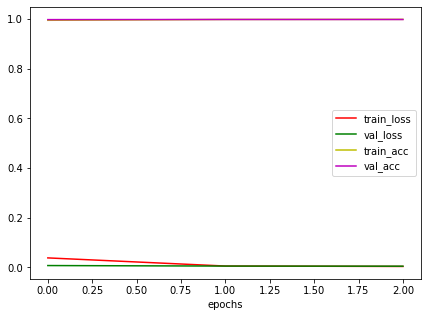

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(np.arange(3),train_loss_lstm,color='r',label='train_loss')
plt.plot(np.arange(3),val_loss_lstm,color='g',label='val_loss')
plt.plot(np.arange(3),train_accurcy_lstm,color='y',label='train_acc')
plt.plot(np.arange(3),val_accuracy_lstm,color='m',label='val_acc')
plt.legend()
plt.xlabel('epochs')
plt.show()


In [ ]:
loss,acc = model.evaluate(X_test_lstm , y_test_lstm)

300/300 [==============================] - 7s 23ms/step - loss: 0.0047 - accuracy: 0.9984


In [ ]:
print(loss)

0.0046876720152795315


In [ ]:
print(acc)

0.9983569383621216


## Checking the developed model with real data

In [ ]:
text = ["SpaceX is an aerospace manufacturer and space transport services company headquartered in California. It was founded in 2002 by entrepreneur and investor Elon Musk with the goal of reducing space transportation costs and enabling the colonization of Mars."]

In [ ]:
p_1 , o_1 = model_bert_2.predict(text)

NameError: ignored

In [ ]:
p_1

[[{'SpaceX': 'B-org'},
  {'is': 'O'},
  {'an': 'O'},
  {'aerospace': 'O'},
  {'manufacturer': 'O'},
  {'and': 'O'},
  {'space': 'O'},
  {'transport': 'O'},
  {'services': 'O'},
  {'company': 'O'},
  {'headquartered': 'O'},
  {'in': 'O'},
  {'California.': 'B-geo'},
  {'It': 'O'},
  {'was': 'O'},
  {'founded': 'O'},
  {'in': 'O'},
  {'2002': 'B-tim'},
  {'by': 'O'},
  {'entrepreneur': 'O'},
  {'and': 'O'},
  {'investor': 'O'},
  {'Elon': 'B-per'},
  {'Musk': 'I-per'},
  {'with': 'O'},
  {'the': 'O'},
  {'goal': 'O'},
  {'of': 'O'},
  {'reducing': 'O'},
  {'space': 'O'},
  {'transportation': 'O'},
  {'costs': 'O'},
  {'and': 'O'},
  {'enabling': 'O'},
  {'the': 'O'},
  {'colonization': 'O'},
  {'of': 'O'},
  {'Mars.': 'B-geo'}]]

## Logic to extract only entities from result

In [ ]:
perfect_words = {}
meaningless_words = []
for t in p_1:
  for i in range(len(t)):
    for l,k in t[i].items():
      if k == 'O':
        meaningless_words.append(l)
      else:
        perfect_words[l] = k
               

In [ ]:
perfect_words

{'2002': 'B-tim',
 'California.': 'B-geo',
 'Elon': 'B-per',
 'Mars.': 'B-geo',
 'Musk': 'I-per',
 'SpaceX': 'B-org'}

In [ ]:
def kamal(text):
  p_1 , o_1 = model_bert_2.predict([text])
  perfect_words = {}
  meaningless_words = []
  for t in p_1:
    for i in range(len(t)):
      for l,k in t[i].items():
        if k == 'O':
          meaningless_words.append(l)
        else:
          perfect_words[l] = k
  return perfect_words
               


In [ ]:
kamal("Mark Zuckerberg is one of the founders of Facebook, a company from the United States")

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

{'Facebook,': 'B-art',
 'States': 'I-geo',
 'United': 'B-geo',
 'Zuckerberg': 'I-per'}

In [ ]:
kamal("SpaceX is an aerospace manufacturer and space transport services company headquartered in California. It was founded in 2002 by entrepreneur and investor Elon Musk with the goal of reducing space transportation costs and enabling the colonization of Mars.")

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

{'2002': 'B-tim',
 'California.': 'B-geo',
 'Elon': 'B-per',
 'Mars.': 'B-geo',
 'Musk': 'I-per',
 'SpaceX': 'B-org'}

### checking with some other data

In [ ]:
test_data_checking = pd.read_csv('/content/test_data.csv')

In [ ]:
test_data_checking.columns

Index(['Unnamed: 0', 'Sentence #', 'Word', 'POS', 'Tag'], dtype='object')

In [ ]:
test_data_checking = test_data_checking.drop(['Unnamed: 0'],axis = 1)

In [ ]:
test_data_checking.head(2)

,Sentence #,Word,POS,Tag
0,NaN,.,.,O
1,Sentence: 13745,The,DT,O


In [ ]:
words = list(set(test_data_checking["Word"].values))
words.append("ENDPAD")
num_words = len(words)

In [ ]:
tags = list(set(test_data_checking["Tag"].values))
num_tags = len(tags)

In [ ]:
class SentenceGetter(object):
    def __init__(self, test_data_checking):
        self.n_sent = 1
        self.test_data_checking = test_data_checking
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(
            s["Word"].values.tolist(),
            s["POS"].values.tolist(),
            s["Tag"].values.tolist()
        )]
        self.grouped = self.test_data_checking.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None
getter = SentenceGetter(test_data_checking)

In [ ]:
getter = SentenceGetter(test_data_checking)
sentences = getter.sentences

In [ ]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [ ]:
loss_1 , acc_1 = model.evaluate(X,y)

285/285 [==============================] - 7s 23ms/step - loss: 2.8565 - accuracy: 0.0012


In [ ]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 50, 50)            800750    
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 200)           120800    
_________________________________________________________________
time_distributed_4 (TimeDist (None, 50, 17)            3417      
Total params: 924,967
Trainable params: 924,967
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
model.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),verbose=1 , batch_size=32,epochs=3)

Epoch 1/3
228/228 [==============================] - 47s 187ms/step - loss: 0.1460 - accuracy: 0.9901 - val_loss: 0.0233 - val_accuracy: 0.9939
Epoch 2/3
228/228 [==============================] - 42s 184ms/step - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.0142 - val_accuracy: 0.9948
Epoch 3/3
228/228 [==============================] - 42s 183ms/step - loss: 0.0108 - accuracy: 0.9956 - val_loss: 0.0119 - val_accuracy: 0.9950


In [ ]:
acc_1,loss_1 = model.evaluate(X_test_lstm,y_test_lstm)

57/57 [==============================] - 1s 23ms/step - loss: 0.0119 - accuracy: 0.9950


In [ ]:
print(acc_1)
print(loss_1)

0.011869605630636215
0.9950219392776489
